In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
np.random.seed(42)
cat_images = np.random.randn(700, 2) + np.array([0,-3])
mouse_images = np.random.randn(700,2) + np.array([3,3])
dog_images = np.random.randn(700,2) + np.array([-3,3])

In [53]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])

labels = np.array([0]*700+[1]*700+[2]*700)

one_hot_labels = np.zeros((2100,3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

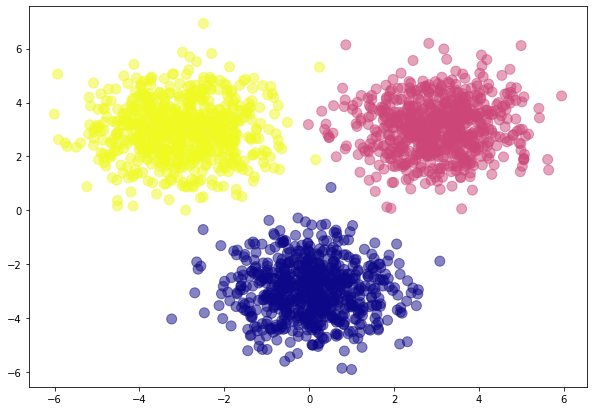

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [55]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [56]:
def sigmoid_backward(x):
    return sigmoid(x)*(1-sigmoid(x))

In [59]:
def softmax(A):
    expA = np.exp(A-np.max(A))
    return expA / expA.sum(axis=1, keepdims=True)


In [79]:
M = 2 #input_nodes
O = 3 #output_nodes
D = 4 #hidden_nodes

In [80]:
def compute_cost(Y,L):
    cost = np.sum(-np.multiply(np.log(Y),L))
    return cost

In [81]:
def backward_prop(L,Y,caches):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    Y -- probability vector, output of the forward propagation's softmax activation
    L -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of tuple of values [(X,alpha),(Z,beta)] coming from the forward propagation in the input and hidden layer
        X -- input data: numpy array of shape (input size, number of examples)
        alpha -- weights matrix of input layer: numpy array of shape (size of hidden layer, size of input layer)
        Z -- activations from hidden layer: numpy array of shape (size of previous layer, number of examples)
        beta -- weights matrix of hidden layer: numpy array of shape (size of output layer, size of hidden layer)
        
    Returns:
     grads -- A dictionary with the gradients
             grads["dβ"] = ... 
             grads["dz"] = ...
             grads["dα"] = ... 
             grads["dx"] = ...
    
    Dimensions:
        m -- numper of examples
        Y.shape() = (3,m)
        b.shape() = (3,4)
        Z.shape() = (4,m)
        alpha.shape() = (4,2)
        X.shape() = (2,m)
        
        I will implement it in two phases
        
        x -> alpha -> a --sig--> z -> beta -> b --sig--> y
        
        ## Phase 1
            dJ/dyi = - li/yi
            dyi/dbi = yi(1-yi)  dyj/dbi = -yi * yj
            dJ/dbi = dJ/dyi * dyi/dbi + \sum_{i \neq j} dJ/dyj * dyj/dbi   
            dJ/dbi = li - yi
            
            dJ/dβij = dJ/dbi * dbi/dβij   dbi/dβij = zj
            dJ/dzj = \sum_i dJ/dbi * dbi/dzj    dbi/dzj = βij
            
        ## Phase 2
            dJ/dai = dJ/dzi * dzi/dai   dzi/dai = sigmoid_backward(ai)
            
            dJ/dαji = dJ/daj * daj/dαji   daj/dαji = xi
            dJ/dxi = \sum_j dJ/daj * daj/dxi    daj/dxi = αji // dx calculation is redundant
    """
    (X,alpha),(Z,beta) = caches
    
    ## Phase 1
    db = L - Y
    dbeta = np.dot(db,Z.T)
    dz = np.dot(beta.T,db)
    
    ## Phase 2
    da = np.multiply(dz,np.multiply(Z,1-Z))
    dalpha = np.dot(da,X.T)
    dx = np.dot(alpha.T,da)
    
    grads["dβ"] = dbeta
    grads["dz"] = dz
    grads["dα"] = dalpha
    grads["dx"] = dx
    
    return grads

In [82]:
def initialize_parameter():
    alpha = np.random.rand(D,M)
    beta = np.random.rand(O,D)
    lr = 10e-4
    
    parameters = {}
    parameters["alpha"] = alpha
    parameters["beta"] = beta
    parameters["lr"] = lr
    
    return parameters

In [83]:
def forward_prop(X,parameters):
    
    alpha = parameters["alpha"]
    beta = parameters["beta"]
    
    A = np.dot(alpha,X)
    Z = sigmoid(A)
    
    B = np.dot(beta,Z)
    Y = softmax(B)
    
    caches = [(A,alpha),(B,beta)]
    
    return Y,caches

In [84]:
def update_parameters(parameters,grads,lr):
    
    parameters["alpha"] -= lr*grads["dα"]
    parameters["beta"] -= lr*grads["dβ"]
    
    return parameters

In [1]:
parameters = initialize_parameter()
n_epoch = 10000
costs = []

for epoch in range(n_epoch):
    
    Y, caches = forward_prop(feature_set.T,parameters)
    grads = backward_prop(one_hot_labels.T,Y,caches)
    parameters = update_parameters(parameters,grads,lr)

    if epoch%200 == 0:
        cost = compute_cost(Y,one_hot_labels)
        Print('Loss function value after {} epochs'.format(epoch), cost)
        costs.append(cost)
        
plt.plot(cost)
plt.show()